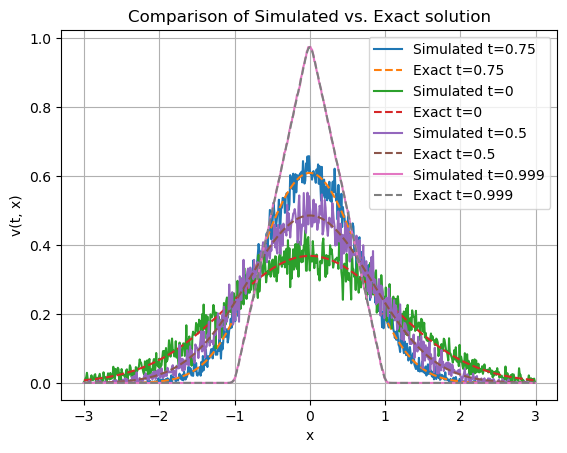

In [6]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

def f(x):
    """End state function for f(x)

    Args:
        x (float): outputs the end state function f(x)

    Returns:
        float: output of the function
    """
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def brownian_motion(x, t):
    """Simulates a Brownian Motion step

    Args:
        x (_type_): current location of the partical
        t (_type_): stepsize of the particle

    Returns:
        float : return the next step of the Brownian motion
    """
    return x + np.sqrt(t) * np.random.normal(0, 1) 

def approximate_v(t, x, num_samples):
    """approximate v at given time with given number of samples

    Args:
        t (float): current time step
        x (float): current location
        num_samples (float): number of samples to create

    Returns:
        float: _description_
    """
    #similar to the expected value expression like in formula 4.2
    return np.mean([f(brownian_motion(x, 1-t)) for _ in range(num_samples)]) 

def exact_solution(t, x):
    """Calculates the exact solution given the density function

    Args:
        t (float): current time location
        x (float): current physical location

    Returns:
        float: exact solution of the equation at the state
    """
    density = lambda y: norm.pdf(y, loc=x, scale=np.sqrt(1-t))
    y_vals = np.linspace(-3, 3, 500)# range for integration, can be adjusted if needed
    dy = y_vals[1] - y_vals[0]
    return np.sum(f(y_vals) * density(y_vals) * dy)

#set the range to look at
l = 3

#create a discretization
x_vals = np.arange(-l, l, 0.01)

#number of samples to calculate at each timestep
num_samples = 100

#iterate through different t sizes
for t in [0.75, 0, 0.5,0.999]:

    #calculate the approximations for different values of x and store in a list
    approximations = [approximate_v(t, x, num_samples) for x in x_vals] # list of means

    #get the exact solutions and store them in a list
    exact_values = [exact_solution(t, x) for x in x_vals]

    #plot the values against each other
    plt.plot(x_vals, approximations, label=f'Simulated t={t}')

    plt.plot(x_vals, exact_values, linestyle='dashed', label=f'Exact t={t}')

plt.legend()
plt.title('Comparison of Simulated vs. Exact solution')
plt.xlabel('x')
plt.ylabel('v(t, x)')
plt.grid(True)
plt.show()

## Question 5

$f(x) = x^2$ , we know that 
$$ v(t,x)= u(T - t, x) = E[B(T - t)^2 | B(0)=x]$$

in which $B(T - t)$ is normal distributed with mean x and variance T - t.

We then see:
$$ v(t,x) = E[B(T - t)^2 | B(0)=x] = E[B(T - t)^2|B(0)=x] = E[B(T - t)]^2 + Var(B(T - t)) = x^2 + T - t$$


$f(x) = e^x$ , we know that 
$$ v(t,x)= u(T - t, x) = E[e^B(T - t)| B(0)=x]$$

which implies 
$$ E[e^{x + t(T - t)}] = \int _{\infty}^{\infty} e^{x + z (T - t)} e^{-z^2/2} dz = \frac{1}{\sqrt{2\pi}} e^x \int _{\infty}^{\infty} e^{z (T - t)}e^{-z^2/2} dz$$

Now we need to complete the squares:
$$\frac{1}{2} (z^2 - 2 (T - t) z) = \frac{1}{2} (z^2 - 2  (T - t) z +  (T - t)^{2}) - \frac{1}{2}  (T - t)^{2} $$

$$ \frac{1}{2} (z - \sigma)^2 - \frac{1}{2} \sigma^{2}$$

Hence, the previous terms equals:
$$\frac{1}{\sqrt{2\pi}} e^{(x + (T - t)^2)/2} \int _{\infty}^{\infty} e^{- (z- (T - t))^2/2} dz$$
= $$e^{x + (T-t)^2/2}$$

## Part C

from IPython.display import Image

fig = Image(filename=('Lecture\ 3.pdf'))
fig

In [1]:
from IPython.display import Image

fig = Image(filename=('Lecture\ 3.pdf'))
fig

ValueError: Cannot embed the 'pdf' image format